In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.geocoders import Nominatim
from time import sleep
from datetime import datetime

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
# read the daily Volume
doh_weekday_factor=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_HOD_weekday.csv')
doh_weekend_factor=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_HOD_weekend.csv')

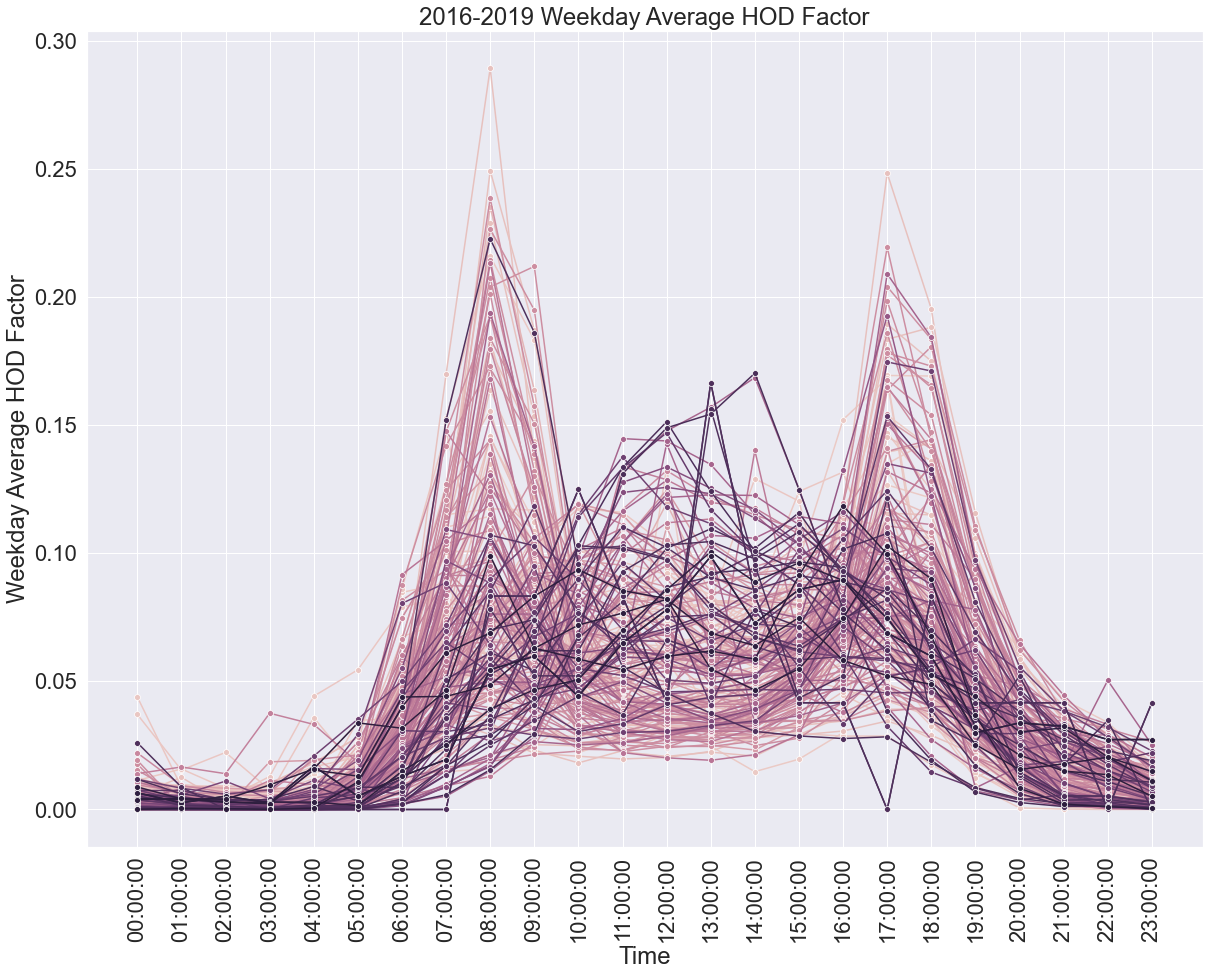

In [8]:
# Combined all 4 years together
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2.0)
import seaborn as sns


#fig, ax = plt.subplots(2,2)

ax=sns.lineplot(x=doh_weekday_factor['starttime'],y=doh_weekday_factor['Average_Yearly_DOH_Factor'],hue=doh_weekday_factor['ID'],
                   markers=True,marker="o", dashes=False,sort=True) 
plt.xticks(rotation = 'vertical')
ax.get_legend().remove()
ax.title.set_text('2016-2019 Weekday Average HOD Factor')
ax.set_ylabel('Weekday Average HOD Factor' )
ax.set_xlabel('Time')
plt.show()

In [9]:
# read the indices
ind=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/Updated_indices.csv')
ind.head()

Unnamed: 0.1    ID  year  Max_WWI  Average_WWI  Weekday_Aergage_AMI  \
0             0   671  2016     2.23         0.77                 0.70   
1             1   671  2017     2.89         0.78                 0.74   
2             2   671  2018     1.35         0.71                 0.86   
3             3   671  2019     1.44         0.66                 0.82   
4             4  1127  2016     2.22         0.26                 2.05   

   Weekend_Aergage_AMI  Average AMI_wday_wend  Max_weekend_AMI  \
0                 0.32                   2.17             0.36   
1                 0.38                   1.97             0.44   
2                 0.29                   2.97             0.30   
3                 0.34                   2.41             0.35   
4                 0.58                   3.51             0.74   

   Max_weekday_AMI  ...       state        country  Unnamed: 0    edgeUID  \
0             0.93  ...  California  United States           0  308723101   
1             1.02  ...  California  United States           0  308723101   
2             1.43  ...  California  United States           0  308723101   
3             1.21  ...  California  United States           0  308723101   
4             2.24  ...  California  United States           1  308779961   

       osmId  stv_total  stv_com_total stv_rec_total  stv_com_ratio  \
0  215845474        NaN            NaN           NaN            NaN   
1  215845474        NaN            NaN           NaN            NaN   
2  215845474    4890.00         260.00       4630.00           0.05   
3  215845474    4625.00         255.00       4370.00           0.06   
4   87297166        NaN            NaN           NaN            NaN   

  stv_rec_ratio  
0           NaN  
1           NaN  
2          0.95  
3          0.94  
4           NaN  

[5 rows x 40 columns]

# Separate weekday Pattern using Max weekday AMI_PMI Value threshold

In [10]:
ind['county'].unique()

array([nan, 'Orange County', 'Alameda County', 'San Diego County',
       'CAL Fire San Diego Unit', 'Marin County', 'San Mateo County',
       'Los Angeles County', 'Contra Costa County', 'El Dorado County',
       'Douglas County', 'Placer County', 'Washoe County',
       'Humboldt County', 'San Luis Obispo County'], dtype=object)

In [11]:
# exclude El darado county
ind1=ind.loc[ind['county']!='El Dorado County']
ind2=ind1.loc[ind['county']!='Douglas County']
ind3=ind2.loc[ind['county']!='Placer County']

In [12]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am/pm_value', 'max_weekend_am/pm', 'max_weekend_am_pm_Value',
       'max_weekday_am/pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [13]:
doh_weekday_factor.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_DOH_Factor'], dtype='object')

In [14]:
max_ami_pmi=pd.DataFrame({'Average_max_ami_pmi':ind.groupby(['ID'])['max_weekday_am_pm_value'].mean()}).reset_index()
max_ami_pmi.shape

(184, 2)

In [15]:
max_ami_pmi['Average_max_ami_pmi'].describe()

count   183.00
mean       inf
std        NaN
min       0.30
25%       1.29
50%       2.11
75%       4.54
max        inf
Name: Average_max_ami_pmi, dtype: float64

In [16]:
doh_weekday_factor.shape

(5328, 4)

In [17]:
weekday_data=pd.merge(doh_weekday_factor,max_ami_pmi, left_on=['ID'],right_on=['ID'],how='inner')
weekday_data.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_DOH_Factor',
       'Average_max_ami_pmi'],
      dtype='object')

In [18]:
def plot (weekday_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekday_data['starttime'],y=weekday_data['Average_Yearly_DOH_Factor'],hue=weekday_data['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Weekday Average HOD Factor')
    ax.set_ylabel('Weekday Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [19]:
d1=weekday_data.loc[weekday_data['Average_max_ami_pmi']<=1.0]
d2=weekday_data[(weekday_data.Average_max_ami_pmi>1)& (weekday_data.Average_max_ami_pmi<=2.5) ]
#d3=weekend_data[(weekend_data.Average_max_ami_pmi>2.5)& (weekend_data.Average_max_ami_pmi<=3.5) ]
d3=weekday_data.loc[weekday_data['Average_max_ami_pmi']>2.5]

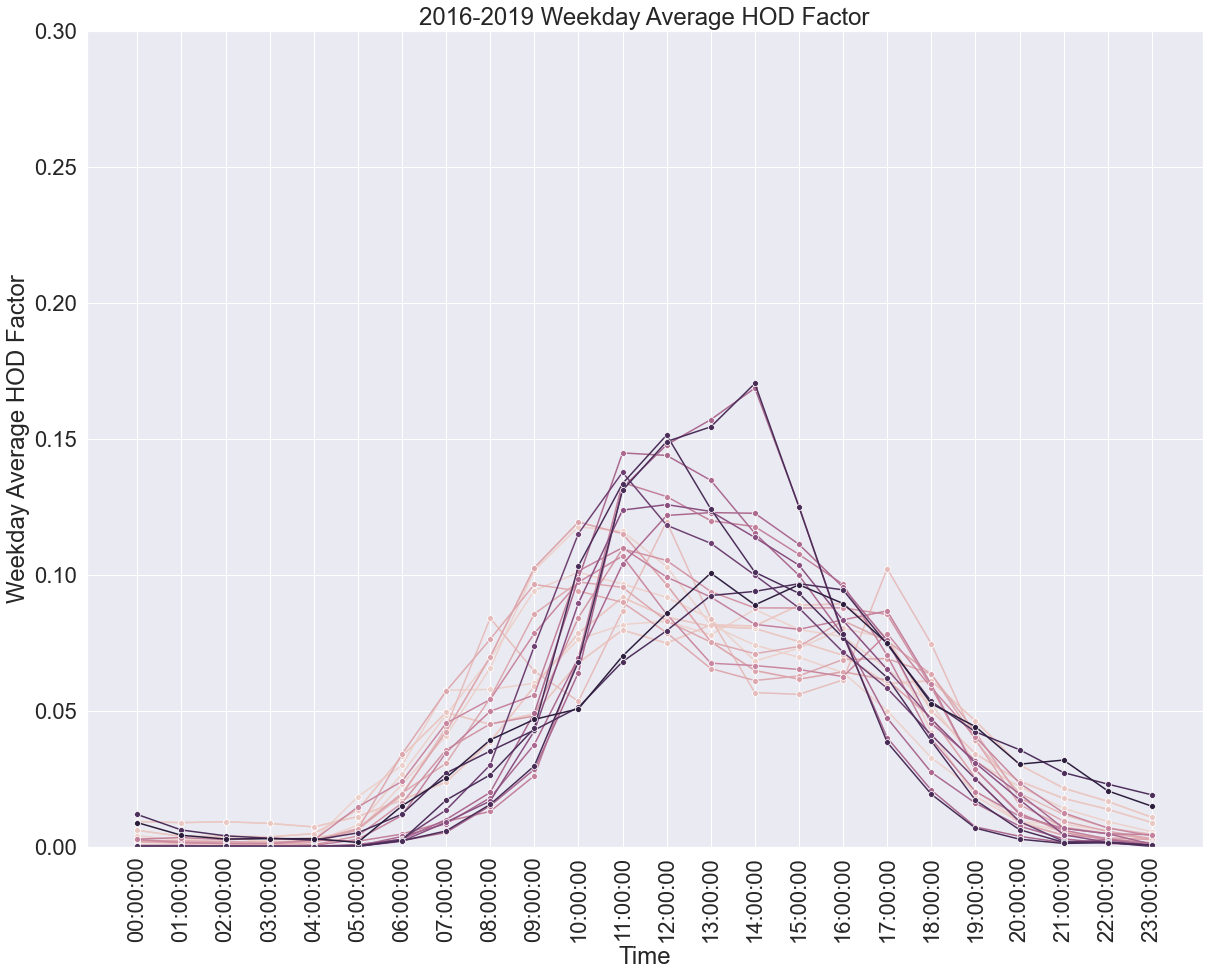

In [20]:
plot(d1)

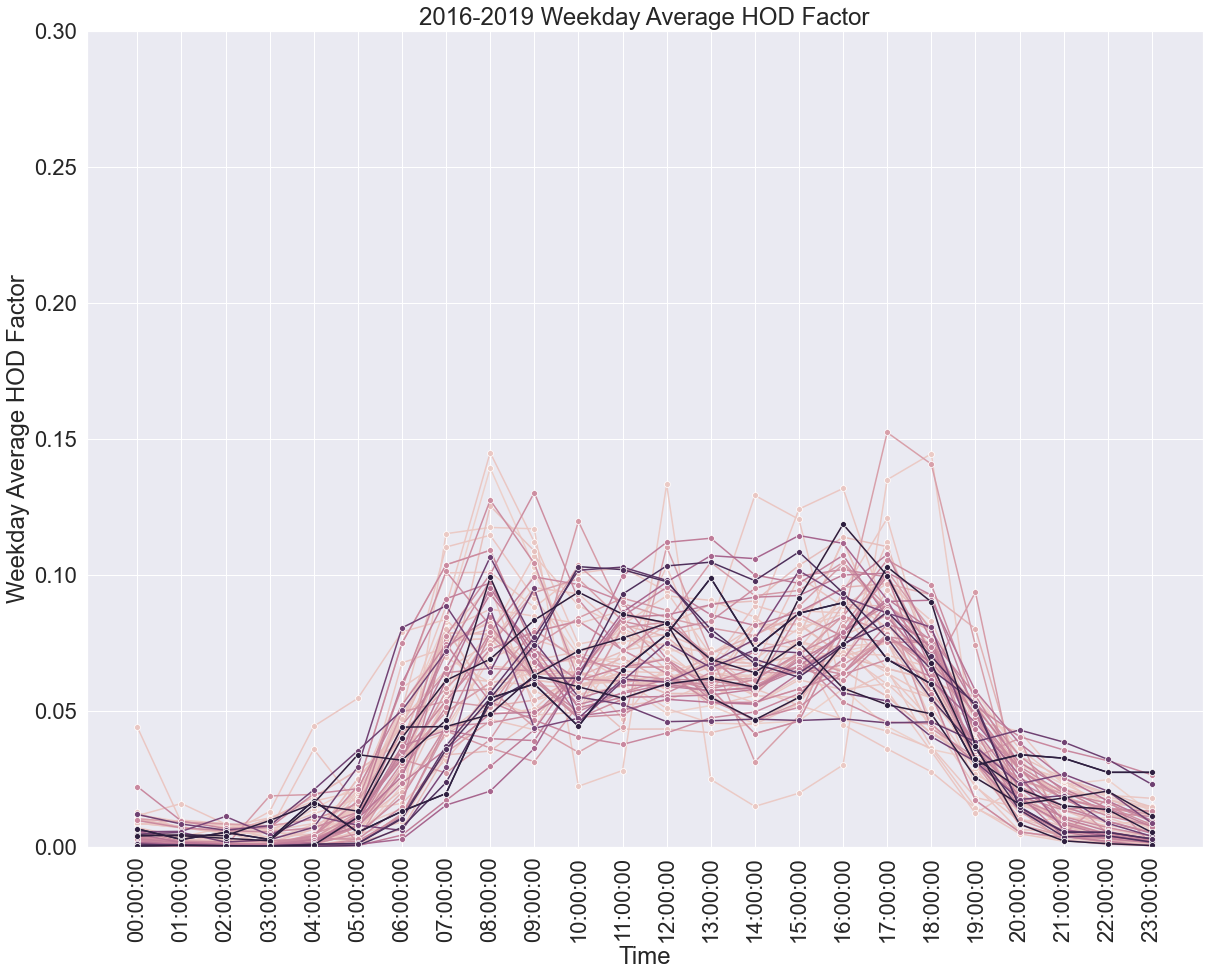

In [21]:
plot(d2)

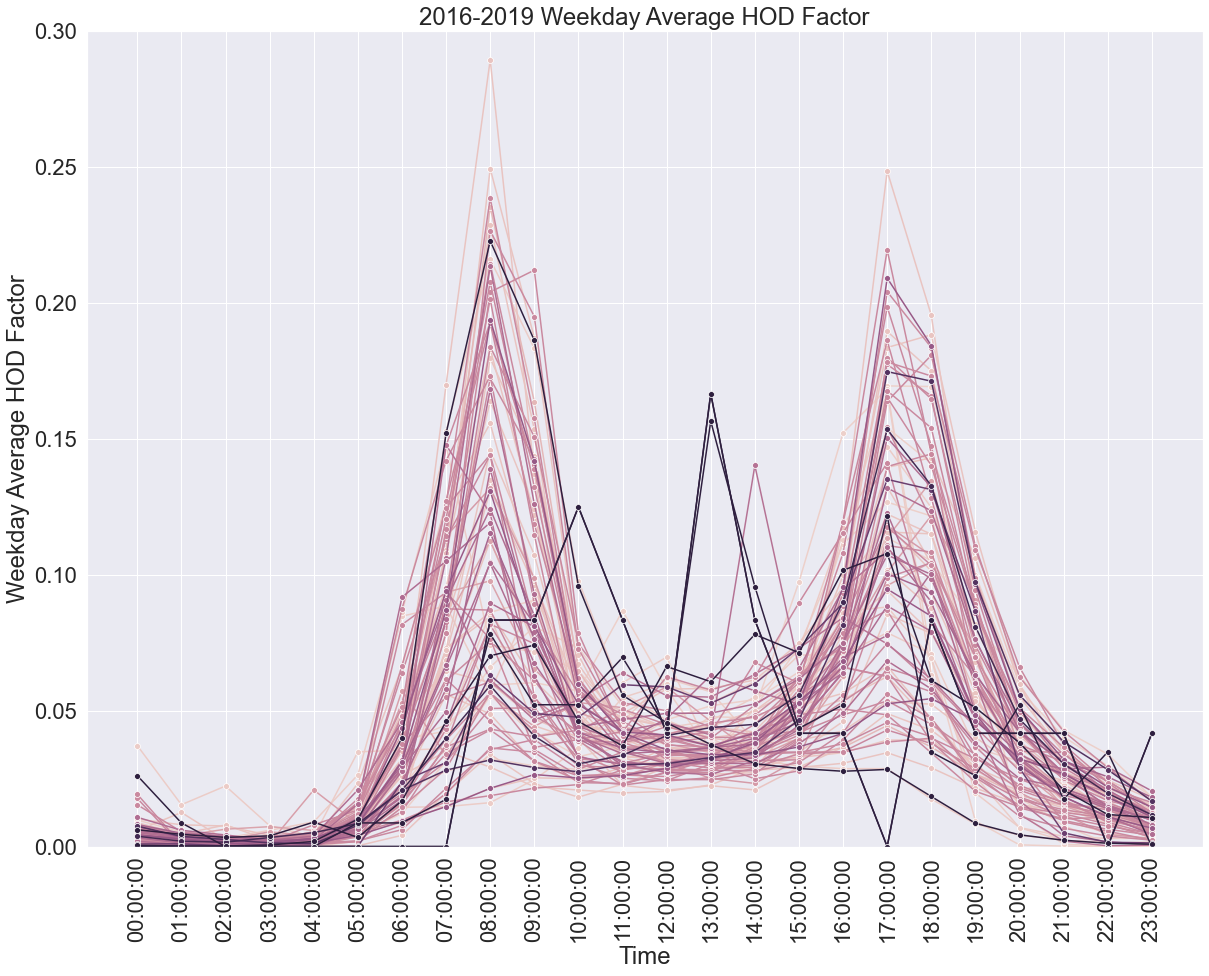

In [22]:
plot(d3)

# Separate weekend Pattern using Max weekday AMI_PMI Value threshold

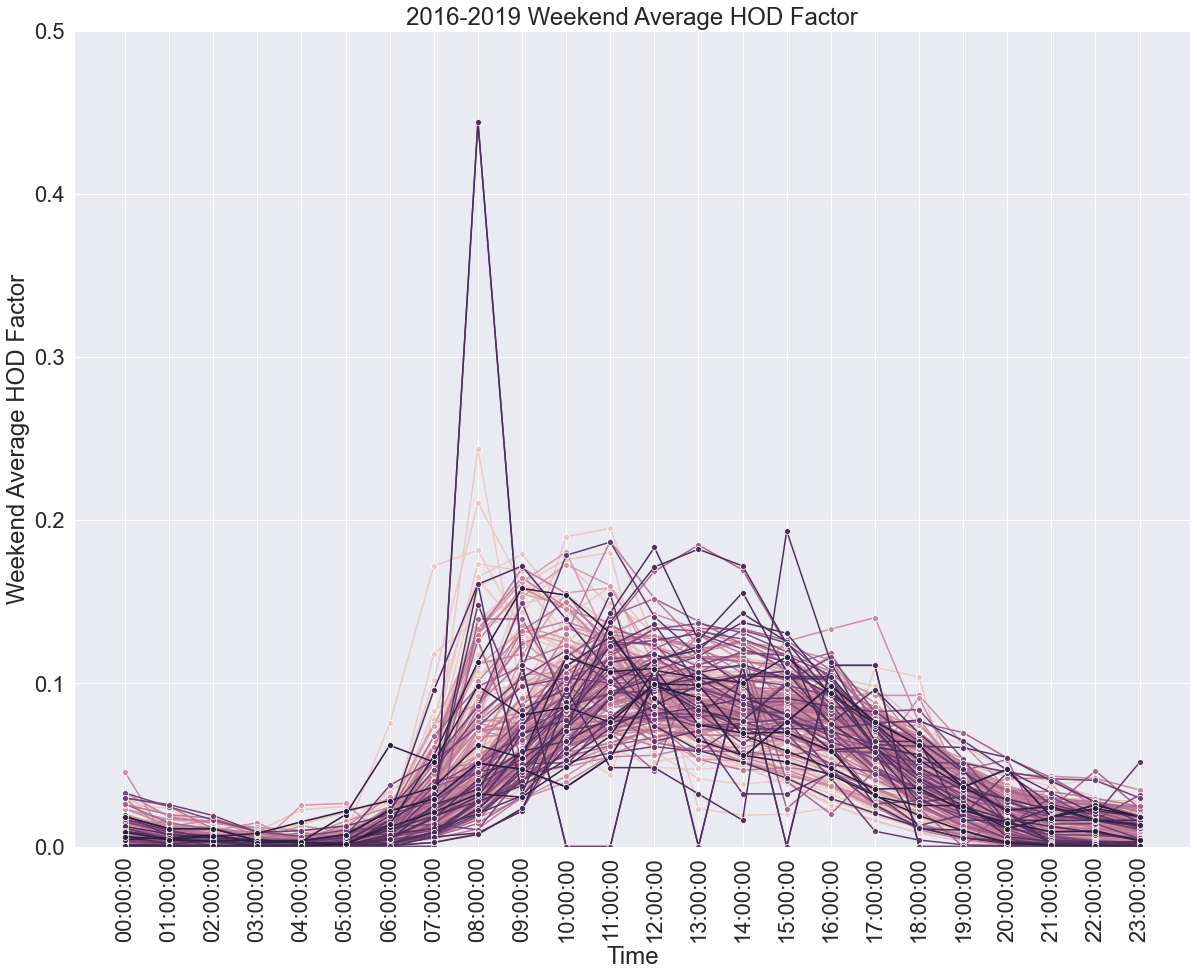

In [23]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2.0)
import seaborn as sns


#fig, ax = plt.subplots(2,2)

ax=sns.lineplot(x=doh_weekend_factor['starttime'],y=doh_weekend_factor['Average_Yearly_DOH_Factor'],hue=doh_weekend_factor['ID'],
                   markers=True,marker="o", dashes=False,sort=True) 
plt.xticks(rotation = 'vertical')
ax.set(ylim=(0, 0.50))
ax.get_legend().remove()
ax.title.set_text('2016-2019 Weekend Average HOD Factor')
ax.set_ylabel('Weekend Average HOD Factor' )
ax.set_xlabel('Time')
plt.show()

In [24]:
max_ami_pmi_rec=pd.DataFrame({'Average_stv_rec_ratio':ind.groupby(['ID'])['stv_rec_ratio'].mean()}).reset_index()
max_ami_pmi_rec.shape

(184, 2)

In [25]:
max_ami_pmi_com=pd.DataFrame({'Average_stv_com_ratio':ind.groupby(['ID'])['stv_com_ratio'].mean()}).reset_index()
max_ami_pmi_com.shape

(184, 2)

In [26]:
max_ami_pmi_weekend=pd.merge(max_ami_pmi_rec,max_ami_pmi_com, left_on=['ID'],right_on=['ID'],how='inner')

In [27]:
max_ami_pmi_weekend.describe()

ID  Average_stv_rec_ratio  Average_stv_com_ratio
count   184.00                 163.00                 163.00
mean  17813.65                   0.72                   0.28
std   15607.14                   0.22                   0.22
min     671.00                   0.26                   0.00
25%    3913.50                   0.55                   0.10
50%   18374.50                   0.80                   0.20
75%   23303.50                   0.90                   0.45
max   59066.00                   1.00                   0.74

In [28]:
weekend_data=pd.merge(doh_weekend_factor,max_ami_pmi_weekend, left_on=['ID'],right_on=['ID'],how='inner')
weekend_data.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_DOH_Factor',
       'Average_stv_rec_ratio', 'Average_stv_com_ratio'],
      dtype='object')

In [29]:
c=weekend_data.loc[weekend_data['Average_Yearly_DOH_Factor']>0.25]
c

Unnamed: 0     ID starttime  Average_Yearly_DOH_Factor  \
4064        4976  50994  08:00:00                       0.44   
4088        5000  50997  08:00:00                       0.44   

      Average_stv_rec_ratio  Average_stv_com_ratio  
4064                   0.86                   0.14  
4088                   0.86                   0.14

In [30]:
weekend_data1=weekend_data.loc[weekend_data['ID']!=50994]
weekend_data2=weekend_data1.loc[weekend_data1['ID']!=50997]

In [31]:
def plot_weekend (weekend_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekend_data['starttime'],y=weekend_data['Average_Yearly_DOH_Factor'],hue=weekend_data['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Weekend Average HOD Factor')
    ax.set_ylabel('Weekend Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [32]:
d1w=weekend_data2.loc[weekend_data2['Average_stv_rec_ratio']<=0.75]
#d2w=weekend_data2[(weekend_data2.Average_stv_rec_ratio>0.6)& (weekend_data2.Average_stv_rec_ratio<=0.90) ]
#d3=weekend_data[(weekend_data.Average_max_ami_pmi>2.5)& (weekend_data.Average_max_ami_pmi<=3.5) ]
d2w=weekend_data2.loc[weekend_data2['Average_stv_rec_ratio']>0.75]

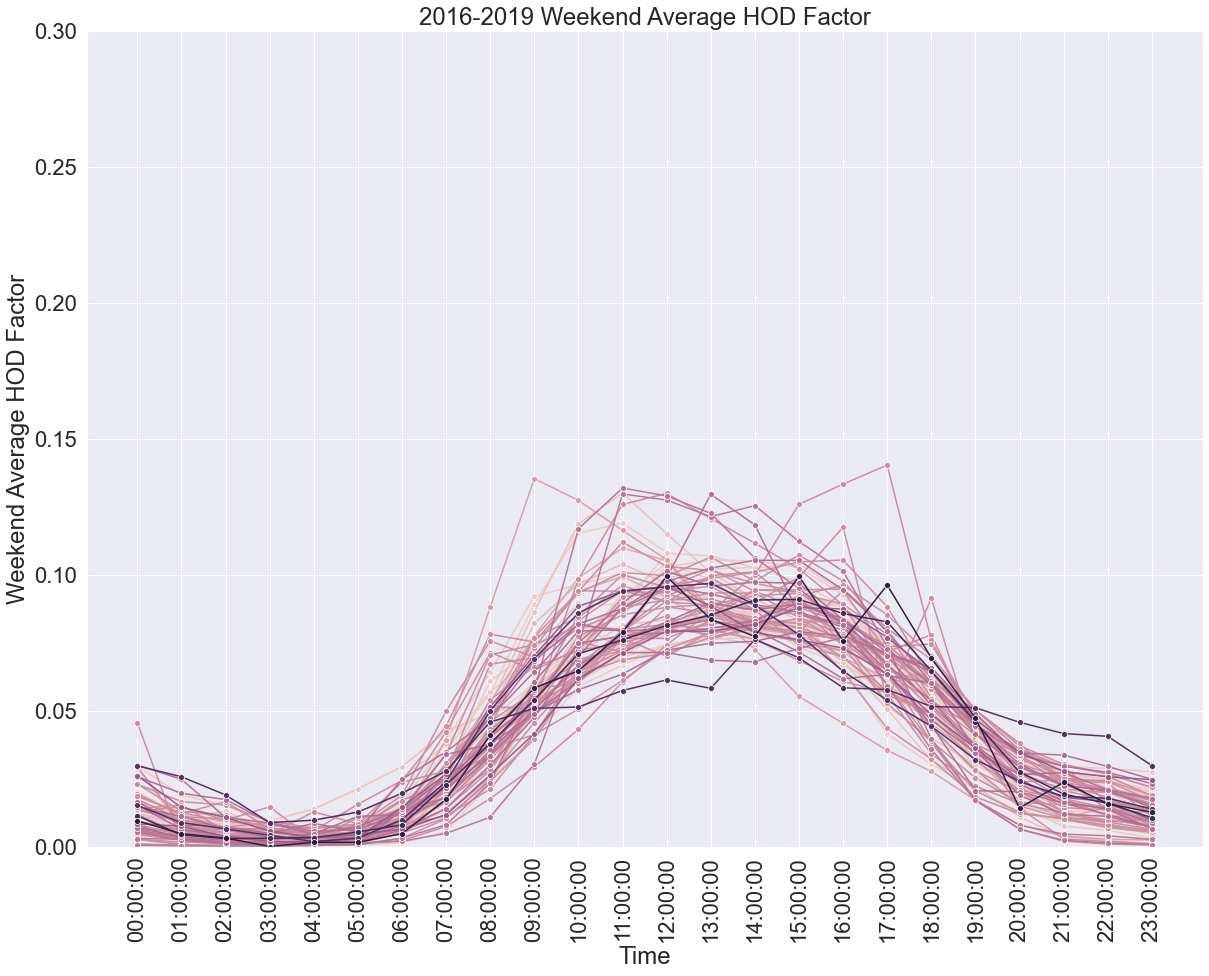

In [33]:
plot_weekend(d1w)

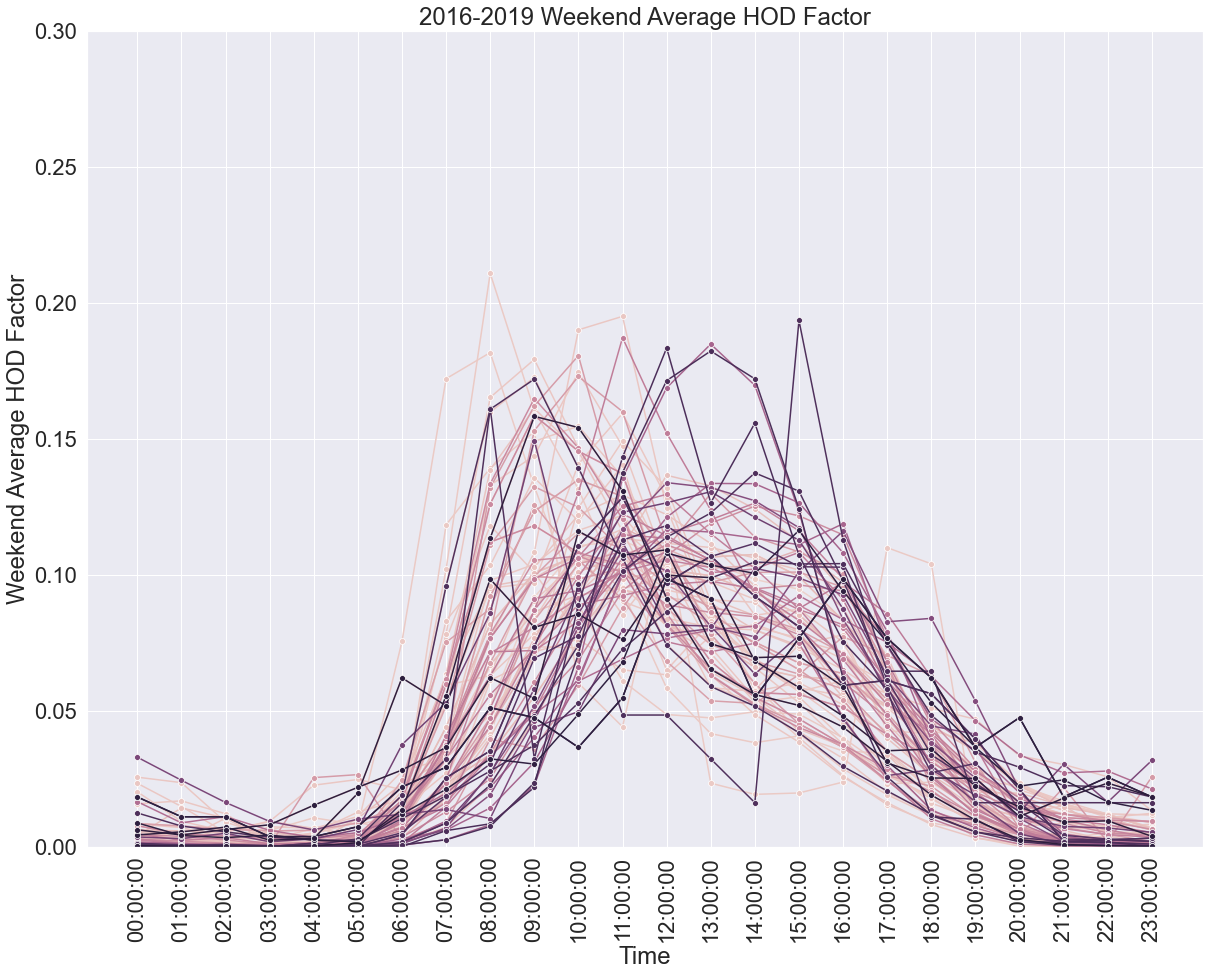

In [34]:
plot_weekend(d2w)

# Break Down DOW Factor Pattern based on WWI Index 0.4 amd >0.4

In [210]:
DOW=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_DOW.csv')
DOW.head()

Unnamed: 0   ID Day of Week  Average_Yearly_DOW_Factor
0           0  671      Monday                       0.11
1           1  671     Tuesday                       0.12
2           2  671   Wednesday                       0.11
3           3  671    Thursday                       0.13
4           4  671      Friday                       0.12

In [213]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am/pm_value', 'max_weekend_am/pm', 'max_weekend_am_pm_Value',
       'max_weekday_am/pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [214]:
ave_wwi=pd.DataFrame({'Average_wwi':ind.groupby(['ID'])['Average_WWI'].mean()}).reset_index()
ave_wwi.shape

(184, 2)

In [211]:
DOW.shape, ind.shape

((1554, 4), (595, 40))

In [215]:
DOW_ind=pd.merge(DOW,ave_wwi,left_on=['ID'],right_on=['ID'],how='inner')
DOW_ind.shape

(1288, 5)

In [216]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
DOW_ind['Day of Week'] = DOW_ind['Day of Week'].astype(cat_type)

In [221]:
def DOW_plot (DOW_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=DOW_ind['Day of Week'],y=DOW_ind['Average_Yearly_DOW_Factor'],hue=DOW_ind['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Average DOW Factor')
    ax.set_ylabel('Average DOW Factor' )
    ax.set_xlabel('Time')
    plt.show()

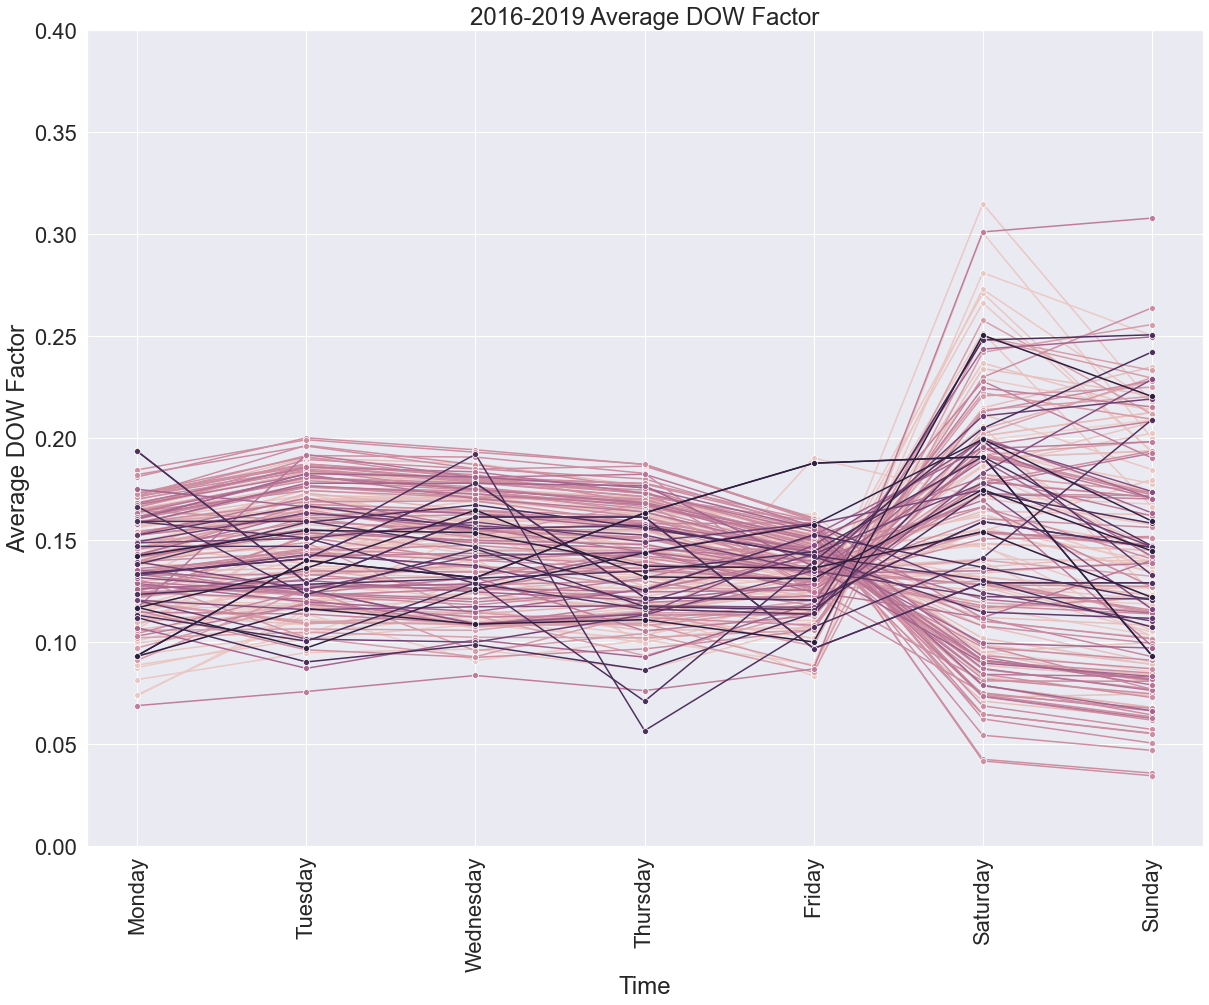

In [222]:
DOW_plot(DOW_ind)

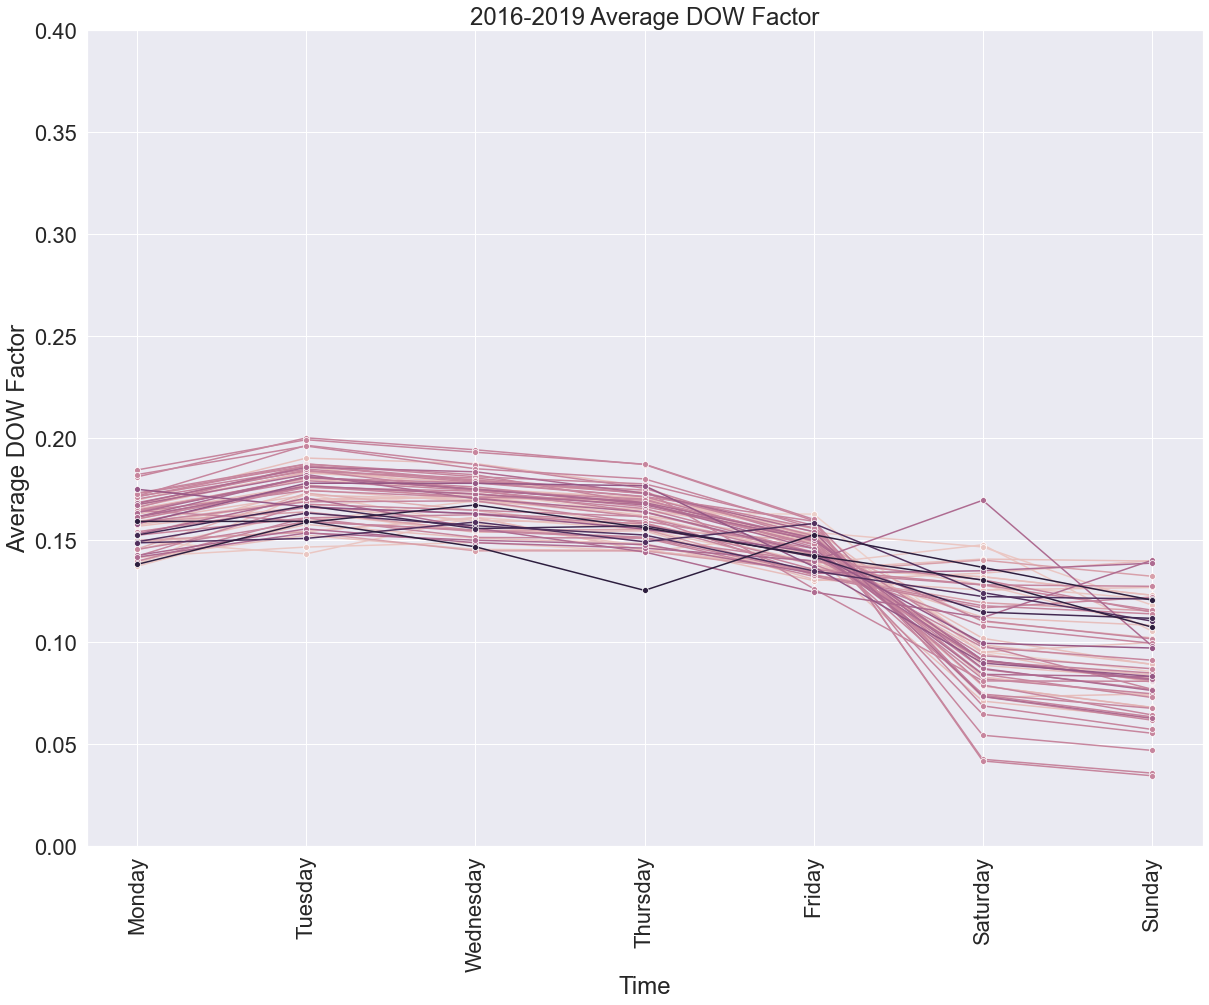

In [251]:
dow1=DOW_ind.loc[DOW_ind['Average_wwi']<=0.40]
DOW_plot(dow1)

In [252]:
#dow2=DOW_ind[(DOW_ind.Average_wwi>0.35) & (DOW_ind.Average_wwi<=0.90)]
#DOW_plot(dow2)

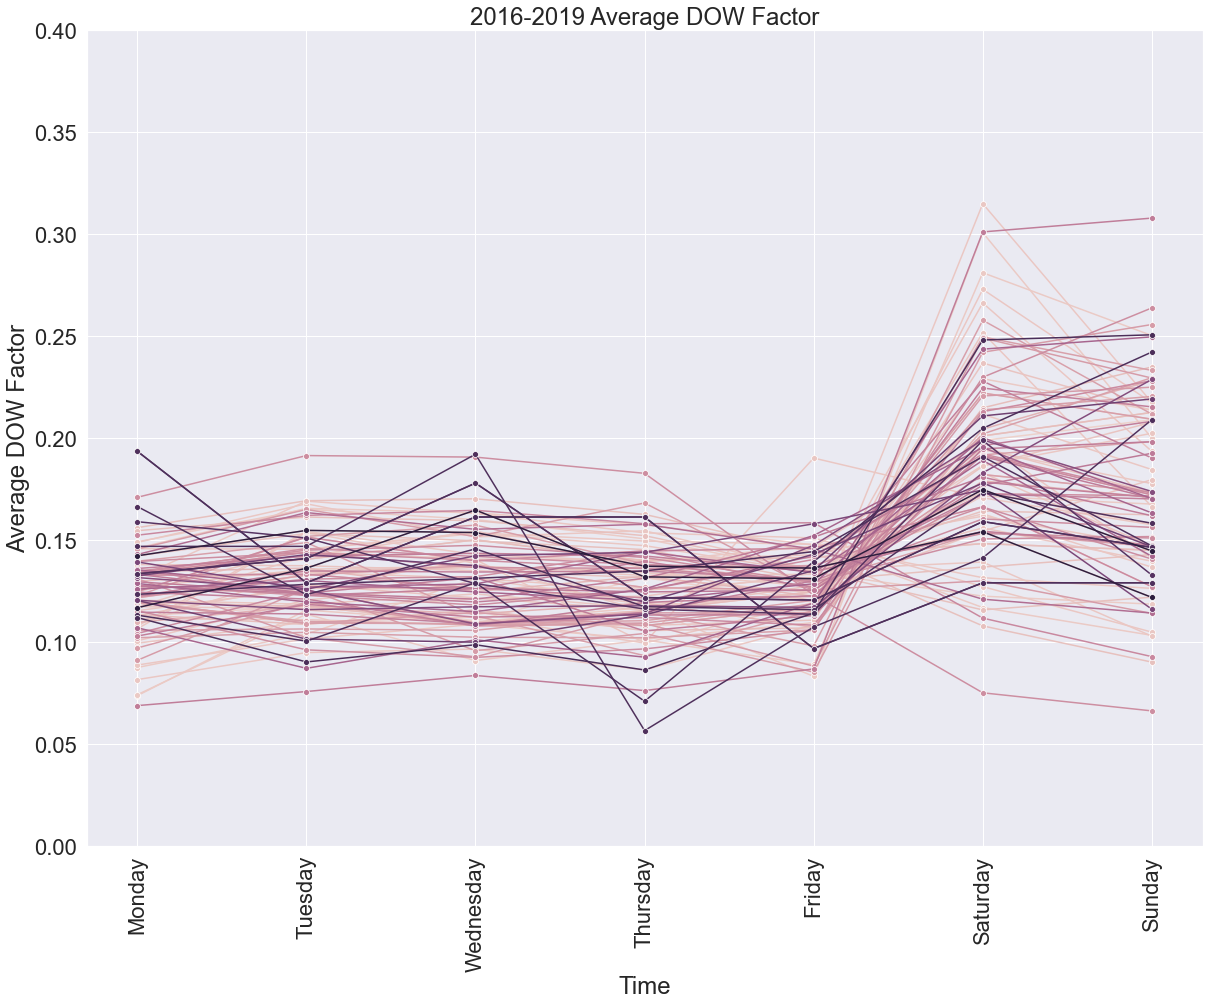

In [253]:
dow3=DOW_ind.loc[DOW_ind['Average_wwi']>0.40]
DOW_plot(dow3)

# Breakdown MOY Pattern by seasonality factor

In [35]:
moy=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_MOY.csv')

In [39]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am/pm_value', 'max_weekend_am/pm', 'max_weekend_am_pm_Value',
       'max_weekday_am/pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [40]:
ses_pa=pd.DataFrame({'Average_seasonal_factor':ind.groupby(['ID'])['seasonal_factor'].mean()}).reset_index()
ses_pa.shape

(184, 2)

In [41]:
MOY_ind=pd.merge(moy,ses_pa,left_on=['ID'],right_on=['ID'],how='inner')
MOY_ind.shape

(1814, 5)

In [43]:
check_anomally=MOY_ind.loc[MOY_ind['Average_seasonal_factor']>3]
check_anomally

Unnamed: 0     ID  month  Average_Yearly_MOY_Factor  \
59            59   2698      1                       0.05   
60            60   2698      2                       0.10   
61            61   2698      3                       0.04   
62            62   2698      4                       0.12   
63            63   2698      5                       0.12   
64            64   2698      6                       0.10   
65            65   2698      7                       0.09   
66            66   2698      8                       0.07   
67            67   2698      9                       0.12   
68            68   2698     10                       0.09   
69            69   2698     11                       0.07   
70            70   2698     12                       0.06   
809          833  13426      1                       0.03   
810          834  13426      2                       0.03   
811          835  13426      3                       0.07   
812          836  13426      4                       0.15   
813          837  13426      5                       0.13   
814          838  13426      6                       0.11   
815          839  13426      7                       0.11   
816          840  13426      8                       0.08   
817          841  13426      9                       0.10   
818          842  13426     10                       0.10   
819          843  13426     11                       0.05   
820          844  13426     12                       0.03   
1661        1853  30665      1                       0.02   
1662        1854  30665      2                       0.01   
1663        1855  30665      4                       0.05   
1664        1856  30665      5                       0.07   
1665        1857  30665      6                       0.16   
1666        1858  30665      7                       0.28   
1667        1859  30665      8                       0.17   
1668        1860  30665      9                       0.13   
1669        1861  30665     10                       0.06   
1670        1862  30665     11                       0.04   
1671        1863  30665     12                       0.00   
1743        2053  50992      1                       0.02   
1744        2054  50992      2                       0.01   
1745        2055  50992      3                       0.00   
1746        2056  50992      4                       0.04   
1747        2057  50992      5                       0.06   
1748        2058  50992      6                       0.15   
1749        2059  50992      7                       0.29   
1750        2060  50992      8                       0.17   
1751        2061  50992      9                       0.14   
1752        2062  50992     10                       0.08   
1753        2063  50992     11                       0.02   
1754        2064  50992     12                       0.02   
1755        2076  51027      1                       0.02   
1756        2077  51027      2                       0.03   
1757        2078  51027      3                       0.00   
1758        2079  51027      4                       0.12   
1759        2080  51027      5                       0.11   
1760        2081  51027      6                       0.19   
1761        2082  51027      8                       0.19   
1762        2083  51027      9                       0.19   
1763        2084  51027     10                       0.12   
1764        2085  51027     11                       0.04   
1765        2086  51027     12                       0.00   

      Average_seasonal_factor  
59                       4.24  
60                       4.24  
61                       4.24  
62                       4.24  
63                       4.24  
64                       4.24  
65                       4.24  
66                       4.24  
67                       4.24  
68                       4.24  
69                       4.24  
70                    

In [45]:
def MOY_plot (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=MOY_ind['month'],y=MOY_ind['Average_Yearly_MOY_Factor'],hue=MOY_ind['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Average MOY Factor')
    ax.set_ylabel('Average MOY Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [69]:
d1m=MOY_ind.loc[MOY_ind['Average_seasonal_factor']<=2]
d2m=MOY_ind[(MOY_ind.Average_seasonal_factor>2)& (MOY_ind.Average_seasonal_factor<=5) ]
d3m=MOY_ind.loc[MOY_ind['Average_seasonal_factor']>5.0]

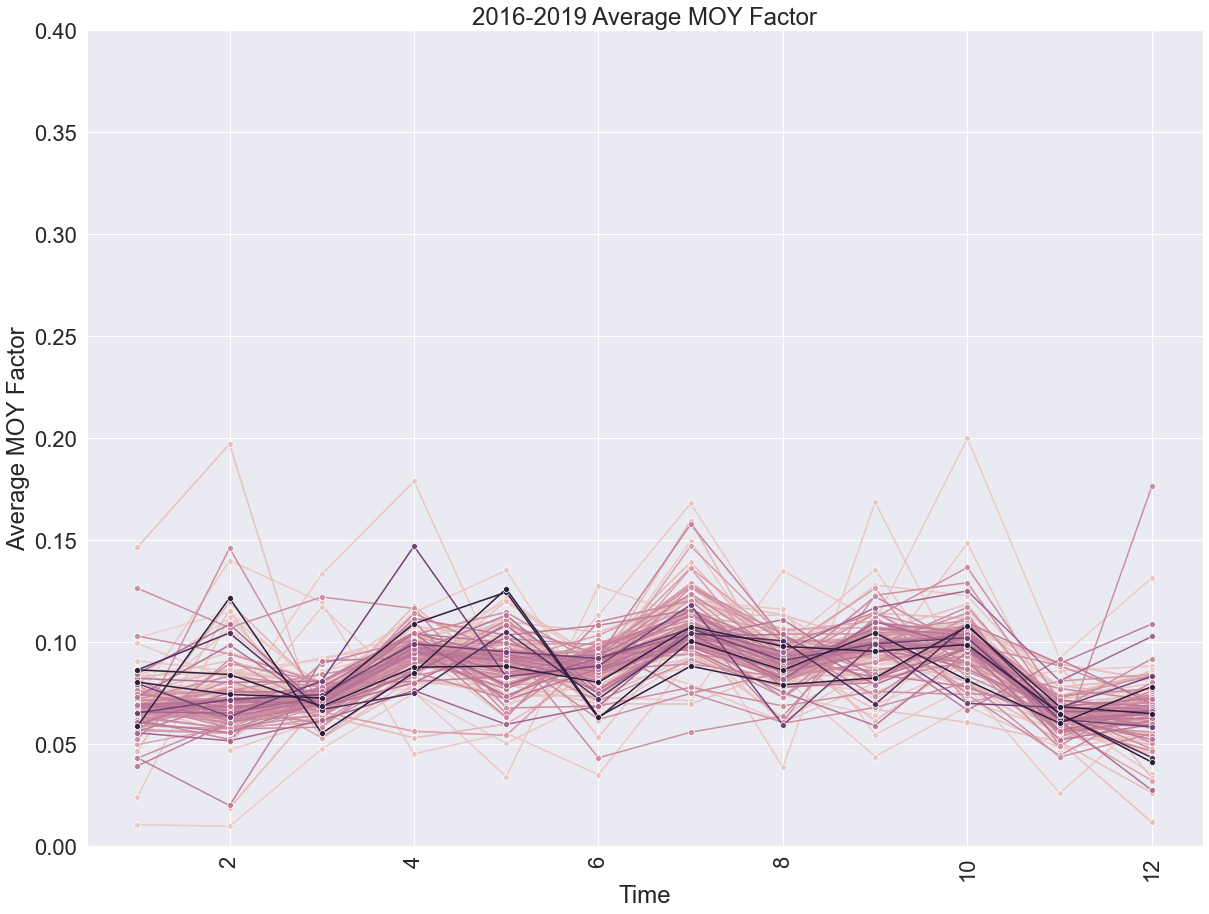

In [70]:
MOY_plot(d1m)

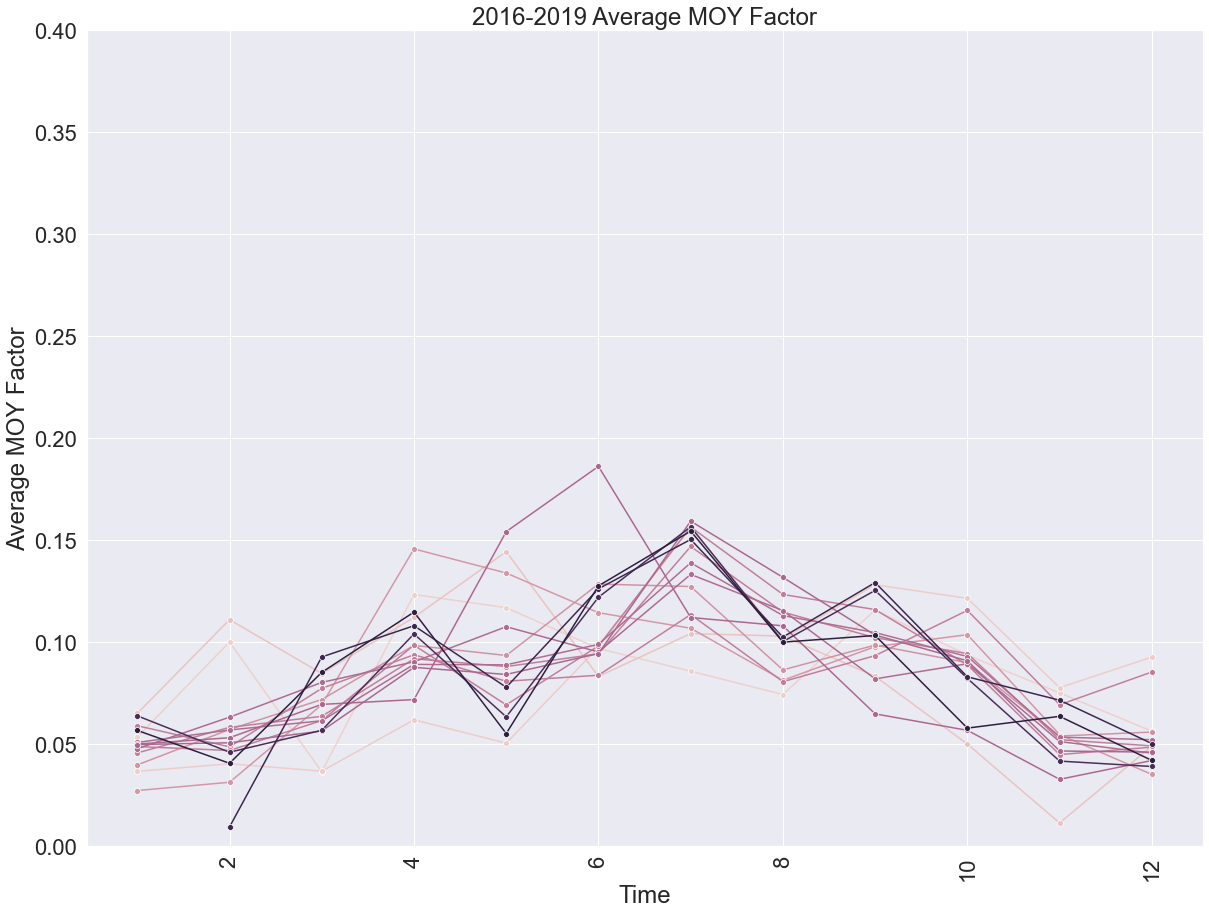

In [71]:
MOY_plot(d2m)

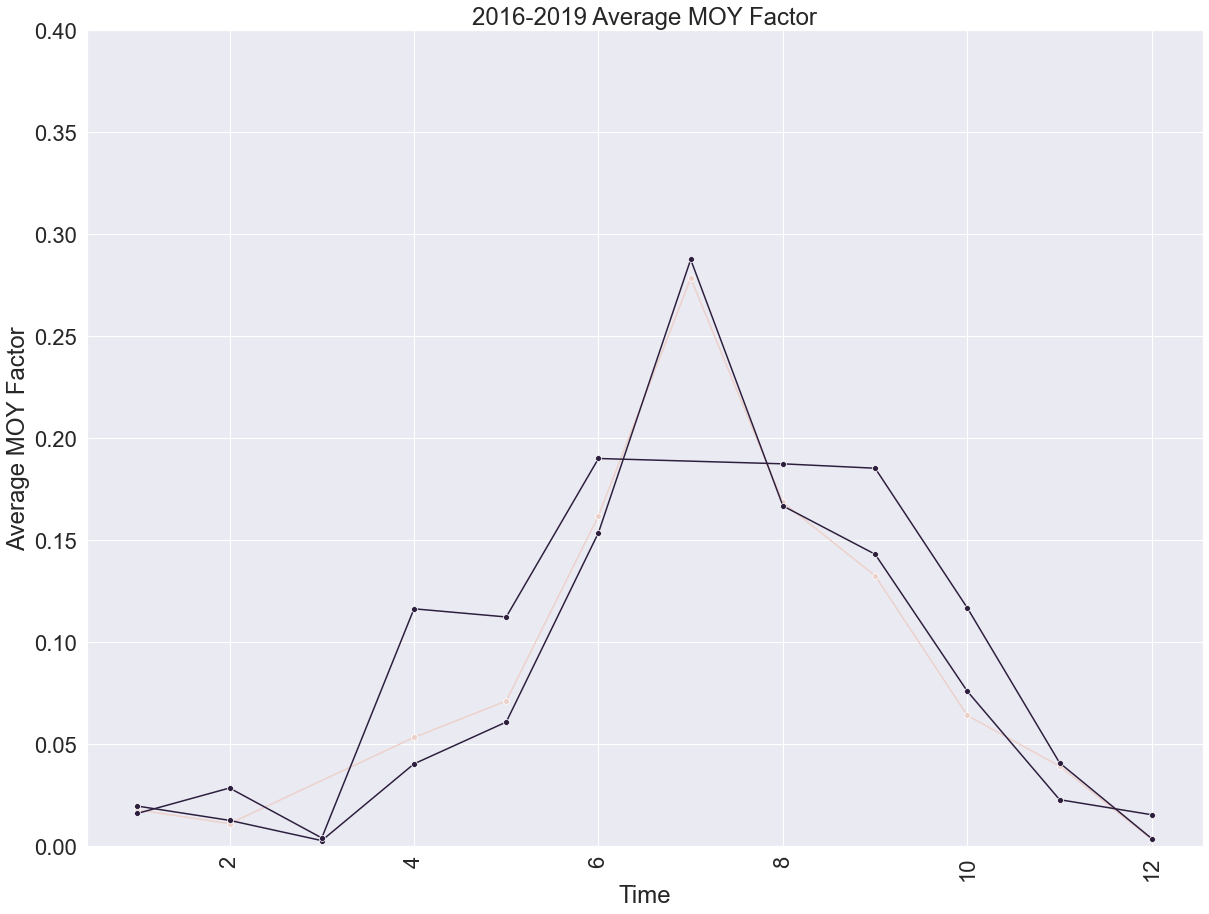

In [72]:
MOY_plot(d3m)

# End of the Code